# EDA: Exploring the Frankenstein Dataset

## Why EDA Matters for Language Model Training

Before training, we need to understand our data:
- **Length distribution:** Are texts too short/long? This affects tokenization and memory.
- **Duplicates:** Duplicate samples can cause overfitting and inflate metrics.
- **Encoding issues:** Non-ASCII characters, special symbols, or encoding errors can break tokenization.
- **Noise:** Empty strings, placeholder text, or corrupted entries waste compute.

For language models, data quality directly impacts:
- Training stability (bad data → NaN losses)
- Generalization (duplicates → memorization)
- Memory usage (long sequences → OOM errors)

## Goals

1. Load and inspect the CSV structure
2. Analyze text length distributions
3. Identify and clean obvious issues
4. Prepare a clean dataset for tokenization


In [2]:
# === TODO (you code this) ===
# Load CSV into a DataFrame; assert 'text' column exists and non-empty.
# Hints:
#   - Use pandas.read_csv()
#   - Check for 'text' column with assert or if statement
#   - Count missing values and duplicates
# Acceptance:
#   - prints n_rows, n_missing, n_dupes

import pandas as pd
from pathlib import Path

csv_path = "../data/raw/frankenstein_chunks.csv"

def load_snippets(csv_path):
    """
    Load CSV file and validate structure.
    
    Args:
        csv_path: Path to CSV file with 'text' column
        
    Returns:
        pd.DataFrame: DataFrame with 'text' column
    """
    df = pd.read_csv(csv_path)
    assert 'text' in df.columns, "Missing 'text' column"
    assert df['text'].notna().all(), "Missing values in 'text' column"
    return df



# Load and inspect
df = load_snippets(csv_path)
print(f"Loaded {len(df)} rows")


Loaded 481 rows


## Length Analysis

Text length matters for language models:
- **Too short:** Wastes padding tokens, less context
- **Too long:** Exceeds model's max sequence length, gets truncated

We'll plot distributions in both characters and approximate tokens (whitespace-split for EDA).


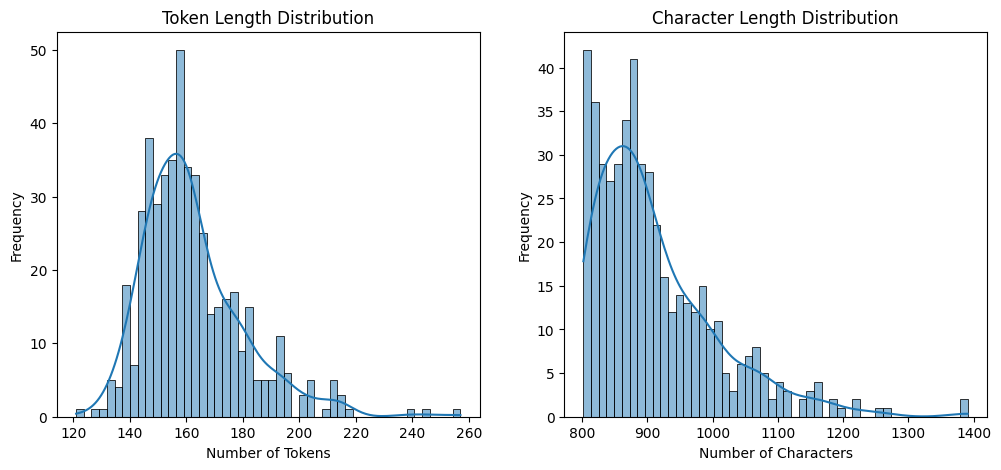

In [7]:
# === TODO (you code this) ===
# Plot length histogram in tokens (roughly) and characters.
# Hints:
#   - Simple whitespace token counts are fine for EDA
#   - Use matplotlib or seaborn for histograms
#   - Show both character and token distributions
# Acceptance:
#   - displays two plots

import matplotlib.pyplot as plt
import seaborn as sns
import os

def plot_lengths(df):
    """
    Plot text length distributions (characters and approximate tokens).
    
    Args:
        df: DataFrame with 'text' column
    """
    tokens = [len(text.split()) for text in df['text']]
    chars = [len(text) for text in df['text']]

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(tokens, bins=50, kde=True)
    plt.title('Token Length Distribution')
    plt.xlabel('Number of Tokens')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.histplot(chars, bins=50, kde=True)
    plt.title('Character Length Distribution')
    plt.xlabel('Number of Characters')
    plt.ylabel('Frequency')
    
    if not os.path.exists('../images'):
        os.makedirs('../images')
    plt.savefig('../images/length_distributions.png')
    plt.show()
    plt.close()

plot_lengths(df)


## Cleaning

Minimal cleaning for language model training:
- Strip leading/trailing whitespace
- Drop empty strings
- Remove duplicates
- Normalize quotes (optional, but helps consistency)

We keep cleaning minimal to preserve the original style.


In [5]:
# === TODO (you code this) ===
# Clean minimal issues: strip whitespace, drop empties/dupes, normalize quotes.
# Hints:
#   - Use .str.strip() for whitespace
#   - Drop rows where text is empty after stripping
#   - Use .drop_duplicates() on 'text' column
#   - Optionally normalize quotes (smart quotes → straight quotes)
# Acceptance:
#   - returns cleaned DataFrame with a 'text' col
#   - prints before/after row counts

def clean_snippets(df):
    """
    Clean text snippets for language model training.
    
    Args:
        df: DataFrame with 'text' column
        
    Returns:
        pd.DataFrame: Cleaned DataFrame
    """
    df = df.copy()
    df['text'] = df['text'].str.strip()
    df = df[df['text'].notna()]
    df = df.drop_duplicates(subset=['text'])
    df['text'] = df['text'].str.replace('“', '"').str.replace('”', '"')
    return df

df_clean = clean_snippets(df)
print(f"Cleaned: {len(df)} → {len(df_clean)} rows")


Cleaned: 481 → 481 rows


## Save Cleaned Data

Save the cleaned dataset for the next step.


In [6]:
# Save cleaned data
df_clean.to_csv("../data/processed/frankenstein_cleaned.csv", index=False)
print("Cleaned data saved!")


Cleaned data saved!
